In [57]:
import numpy as np
import matplotlib.pyplot as plt

class IK():
    def __init__(self, v):

        # gating variables
        self.n_array = []

        # initial conditions
        self.g_bar_K = 0.36
        self.EK = -72.14
        self.n_array.append(self.n_inf(v))
        self.i_list = []

    def n_inf(self, v):
        return self.An(v) / (self.An(v) + self.Bn(v))

    # change in gating variables 
    def dndt(self, v, n):
        return self.An(v) * (1 - n) - (self.Bn(v) * n)

    # forward rate constant
    def An(self, v):
        return (0.01 * (v + 50)) / (1 - np.exp((-(v + 50)) / 10))

    # reverse rate constant
    def Bn(self, v):
        return 0.125 * np.exp(-(v + 60) / 80)

    def get_current(self, v, dt):

        # get gate
        n = self.n_array[-1]

        # update new n value
        self.n_array.append(n + (dt * self.dndt(v, n)))

        # use new gate value
        n = self.n_array[-1]

        # calculate conductance
        gK = self.g_bar_K * (n**4)

        # return current
        i = gK * (v - self.EK)  * dt
        self.i_list.append(i)
        return i 

class INa():
    def __init__(self, v):

        # gating variables
        self.m_array = []
        self.h_array = []
        self.i_list = []

        # initial conditions
        self.g_bar_Na = 1.2
        self.ENa = 55.17
        self.m_array.append(self.m_inf(v))
        self.h_array.append(self.h_inf(v))

    def m_inf(self, v):
        return self.Am(v) / (self.Am(v) + self.Bm(v))

    def h_inf(self, v):
        return self.Ah(v) / (self.Ah(v) + self.Bh(v))

    def dmdt(self, v, m):
        return self.Am(v) * (1 - m) - (self.Bm(v) * m)

    def dhdt(self, v, h):
        return self.Ah(v) * (1 - h) - (self.Bh(v) * h)

    def Am(self, v):
        #return (0.091 * (v + 38)) / (1 - np.exp(-(v + 38) / 5)) # m and h
        return (0.1 * (v + 35)) / (1 - np.exp((-(v + 35)) / 10)) # h and h


    def Bm(self, v):
        #return (-0.062 * (v + 38)) / (1 - np.exp((v + 38) / 5))  # m and h
        return 4.0 * np.exp(-0.0556 * (v + 60))  # h and h


    def Ah(self, v):
        #return 0.016 * np.exp((-55 - v) / 15)   # m and h
        return 0.07 * np.exp(-0.05 * (v + 60))   # h and h


    def Bh(self, v):
        #return 2.07 / ((np.exp(17 - v) / 21) + 1)    # m and h
        return 1 / (1 + np.exp(-0.1 * (v + 30)))      # h and h


    def get_current(self, v, dt):

        # get last values of m and h
        m = self.m_array[-1]
        h = self.h_array[-1]

        # update 
        self.m_array.append(m + (dt * self.dmdt(v, m)))
        self.h_array.append(h + (dt * self.dhdt(v, h)))

        # use new values
        m = self.m_array[-1]
        h = self.h_array[-1]

        # conductance
        gNa = self.g_bar_Na * (m**3) * h

        # return
        i = gNa * (v - self.ENa) * dt
        self.i_list.append(i)
        return i 

class Ileak():
    def __init__(self, v):

        self.g_bar_leak = 0.003
        self.Eleak = -49.42
        self.i_list = []

    def get_current(self, v, dt):

        # conductance
        gleak = self.g_bar_leak

        # return
        i = gleak * (v - self.Eleak) * dt
        self.i_list.append(i)
        return i

class It():
    def __init__(self, v):
         
         self.N = 2
         self.v_half_m = -57
         self.v_half_h = -81 
         self.k_m = -6.2
         self.h_h = 4.0

    def Tm(self, v):
        return (1 / (np.exp((v + 132) / -16.7) + np.exp((v + 16.8) / 18.2))) + 0.612

    def Th(self, v):
        if v < -80:
            return np.exp((v + 467) / 66.6)
        else:
            return np.exp((v + 22) / -10.5) + 28

    def dm(self, v, m, dt):
        return m_inf(v) - (self.m_inf(v) - n) * np.exp(-dt / self.Tm(v))

    def dh(self, v, h, dt):
        return h_inf(v) - (self.h_inf(v) - h) * np.exp(-dt / self.Th(v))

    def m_inf(self, v):
        return (1 / (1 + np.exp((v - self.v_half_m )/ self.k_m))) ** self.N

    def h_inf(self, v):
        return (1 / (1 + np.exp((v - self.v_half_h )/ self.k_h))) ** self.N

    def g_hat(self):
        return (self.m_array[-1] ** self.N) * self.h_array[-1]

    def g_max(self):
        return

    def get_current(self, v, dt):
        
        # update gating variables
        self.m_array.append()

        # calculate current
        E = v
        F = 96485.33289
        R = 8.3144598
        T = 297.15
        z = 2
        ca_out = 3  # mM
        ca_in = 0  # round
        P = g_max()
        t1 =  P * z**2 * E * F ** 2 / (R * T)
        t2 = np.exp(-z * F * E / (R * T))

        # return current
        i = self.g_hat() * P * t1 * (-ca_out) * t2 / (1 - t2)
        self.i_list.append(i)
        return i

class Ih():
    def __init__(self, v):

        self.N = 1
        self.g_max = 20     # 15-30 nS... will probably have to play around with units
        self.Eh = -43
        self.v_half_m = -75
        self.k = 5.5
        self.i_list = []

        # initial conditions
        self.m_array.append(m_inf(v))

    def dm(self, v, m, dt):
        return m_inf(v) - (self.m_inf(v) - n) * np.exp(-dt / self.Tm(v))

    def Tm(self, v):
        return (1 / np.exp(-14.59 - 0.086 * v) + np.exp(-1.87 + 0.0701 * v))

    def g_hat(self):
        return self.m_array[-1] ** self.N

    def m_inf(v):
        return (1 / (1 + np.exp((v - self.v_half_m )/ self.k_m))) ** self.N

    def get_current(self, v, dt):

        # update gating variables
        self.m_array.append(self.dm(v))
        
        # get current
        i = self.g_hat() * self.g_max * (v - self.Eh)
        self.i_list.append(i)

        # return
        return i
    

In [58]:
# initial settings for simulation
dt = 0.01
ms_to_plot = 10
t = np.arange(0, ms_to_plot, dt)
I = 0.1
initial_v = -60
#Cm = 0.29  # m and h
Cm = 0.01  # h and h
v_array = [initial_v]

# initialize our channel objects
k = IK(initial_v)
na = INa(initial_v)
leak = Ileak(initial_v)

# iterate timepoints
for i in range(0, len(t) - 1):

    # get last v
    v = v_array[-1]
    dvdt = 1 / Cm * (I*dt - (k.get_current(v, dt) + na.get_current(v, dt) + leak.get_current(v, dt)))
    v_array.append(v + (dvdt))


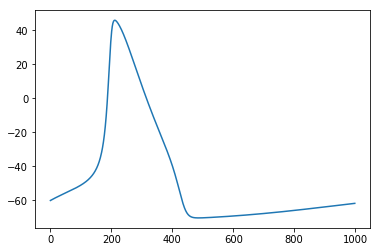

In [59]:
plt.plot(v_array)
plt.show()

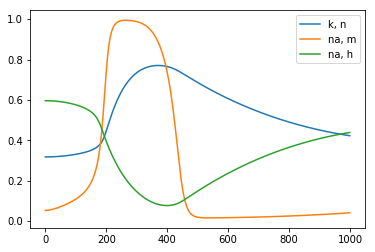

In [60]:
plt.plot(k.n_array)
plt.plot(na.m_array)
plt.plot(na.h_array)
plt.legend(['k, n', 'na, m', 'na, h'])
plt.show()

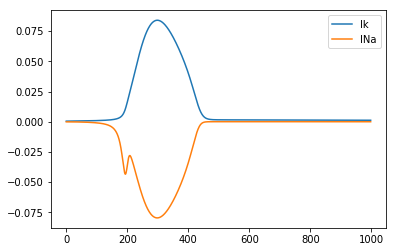

In [61]:
plt.plot(k.i_list)
plt.plot(na.i_list)
plt.legend(['Ik', 'INa'])